In [1]:
#B220038B Test 1
#Q3

In [11]:
# libraries to  be used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # provides interactive plots that allow you to see data points on hover

print("done")

done


In [2]:
# Read the dataset into a DataFrame
coffee = pd.read_csv("coffee.csv")

coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [4]:
# to change the date from STr to date
if 'transaction_date' in coffee.columns: 
    coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'], errors='coerce')
    
# Drop rows with NaT in 'transaction_date' after conversion
coffee = coffee.dropna(subset=['transaction_date'])

coffee

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
127633,127970,2023-12-06,19:52:50,1,8,Hell's Kitchen,71,3.75,Bakery,Pastry,Chocolate Croissant
127634,127971,2023-12-06,19:53:19,2,8,Hell's Kitchen,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg
127635,127972,2023-12-06,19:54:10,1,8,Hell's Kitchen,53,3.00,Tea,Brewed Chai tea,Traditional Blend Chai Lg
127636,127973,2023-12-06,19:57:11,1,3,Astoria,77,3.00,Bakery,Scone,Oatmeal Scone


In [7]:
# Group by product category and product type, and sum the transaction quantity
total_orders = coffee.groupby(['product_category', 'product_type'])['transaction_qty'].sum().reset_index()

# Rename columns for clarity
total_orders.columns = ['category', 'product', 'total_order']

# Display the total orders DataFrame
total_orders

,category,product,total_order
0,Bakery,Biscotti,2282
1,Bakery,Pastry,2830
2,Bakery,Scone,3675
3,Branded,Clothing,30
4,Branded,Housewares,150
5,Coffee,Barista Espresso,9372
6,Coffee,Drip coffee,5233
7,Coffee,Gourmet brewed coffee,9950
8,Coffee,Organic brewed coffee,4990
9,Coffee,Premium brewed coffee,5198


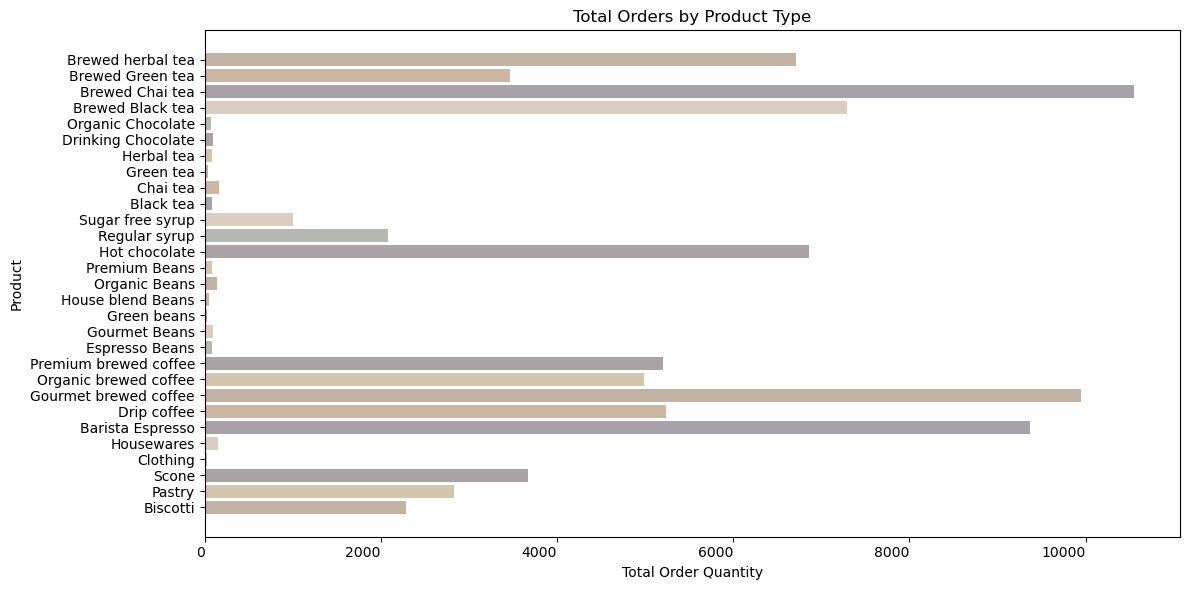

In [15]:
import matplotlib.pyplot as plt

# Morandi color palette
morandi_colors = ['#C1B2A3', '#D1C6AD', '#A9A3A5', '#B5B8B1', '#D9CEC1', '#A7A2A9', '#C9B7A3']

# Plot the total orders with Morandi colors
plt.figure(figsize=(12, 6))

# Apply Morandi colors
plt.barh(total_orders['product'], total_orders['total_order'], color=morandi_colors[:len(total_orders)])

plt.ylabel('Product')
plt.xlabel('Total Order Quantity')
plt.title('Total Orders by Product Type')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels

# Save and show the plot
plt.savefig("Total Order by Product Type.png")  # Save the figure
plt.show()  # Show the plot
plt.close()


In [13]:
# Create an interactive line plot
fig = px.line(
    total_orders,  # Use the passed DataFrame
    y='total_order',  
    x='product', 
    title='Total Orders by Product Type', 
    labels={ 'product': 'Product','total_order': 'Total Order Quantity'}  # Adjust labels
)

# Update traces to include hover information
fig.update_traces(mode='lines+markers', hovertemplate='Product: %{x}<br>Total Order: %{y}')

# Show the plot
fig.show()